In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
class Metrics: 
    def __init__(self, logs, method): 
        self.logs = logs 
        self.raw_metrics = self.calculate_metrics(logs)
        self.method = method
        
    def extract_metrics(self, filename): 
        f = open(filename, 'r')
        lines = f.readlines() 
        gpu_usage = None
        gpu_mem = None
        for line in lines: 
            if "=> Average precision" in line: 
                accuracy = float(line.split(" ")[-1])
            if "=> Total training time" in line: 
                training_time = float(line.split(" ")[-2])
            if "GPU BEFORE EVALUATION:" in line: 
                gpu_usage, gpu_mem = eval(line[22:])
        return (accuracy, training_time, gpu_usage, gpu_mem)
    
    def calculate_metrics(self, files): 
        metrics = dict()

        for file in files: 
            iters, g_fc_uni, _ = file.split("_")
            iters = int(iters)
            g_fc_uni = int(g_fc_uni)
            if (iters, g_fc_uni) in metrics: 
                metrics[(iters, g_fc_uni)].append(self.extract_metrics(file))
            else: 
                metrics[(iters, g_fc_uni)] = [self.extract_metrics(file)] 

        return metrics
    
    def get_metrics_df(self): 
        rows = []
        for key in self.raw_metrics: 
            vals = self.raw_metrics[key]
            rows.append([key[0], key[1]] + [np.mean(x) for x in list(zip(*vals))])
        param = "g_fc_uni" if self.method == "generative" else "buffer_size"
        return pd.DataFrame(rows, columns=["iters", param, "Accuracy", "Training time (s)", "GPU Usage (%)", "GPU Memory (MB)"])
            

# 1. LGR

In [3]:
cd ~/Desktop/research_project_repo/research_project/experiments/vgg_lgr_class_tuning/2021-05-08-03-25

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_lgr_class_tuning/2021-05-08-03-25


In [4]:
logs = !ls

In [5]:
m = Metrics(logs, "generative")
df = m.get_metrics_df()
df

,iters,g_fc_uni,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,2000,1600,0.4084,2820.0,18.741135,354.0
1,2000,200,0.3235,2732.2,16.386861,14.0
2,2000,400,0.3667,2758.5,16.268116,26.0
3,2000,800,0.3776,2787.6,17.215054,138.0
4,3000,1600,0.4526,4292.0,18.167442,354.0
5,3000,200,0.3778,4258.2,15.953052,14.0
6,3000,400,0.5081,4122.7,16.389831,26.0
7,3000,800,0.4802,4218.7,17.037915,138.0


### LGR: Accuracy

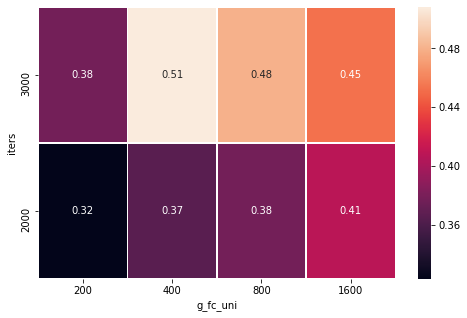

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### LGR: GPU Memory Consumption

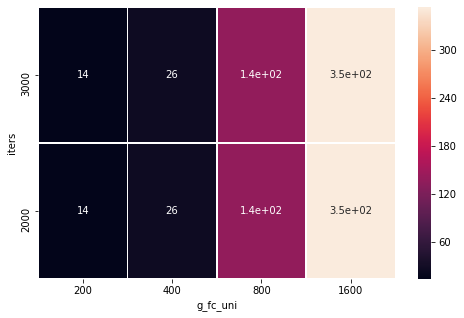

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### LGR: GPU Average Usage (%)

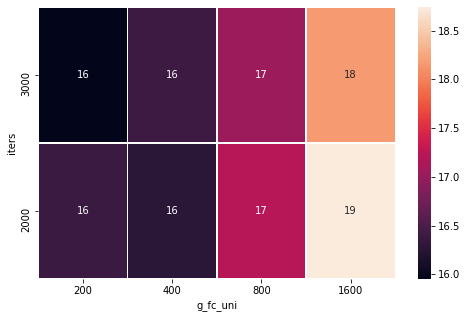

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# 2. LR

In [9]:
cd ~/Desktop/research_project_repo/research_project/experiments/vgg_lr_class_tuning/2021-05-08-14-54/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_lr_class_tuning/2021-05-08-14-54


In [10]:
logs = !ls

In [11]:
m = Metrics(logs, "rehearsal")
df = m.get_metrics_df()
df

,iters,buffer_size,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,2000,1000,0.6159,2560.3,15.488281,302.0
1,2000,1500,0.5593,2591.7,15.461538,454.0
2,2000,200,0.5487,2561.5,15.817121,72.0
3,2000,500,0.5550,2593.6,15.523077,162.0
4,3000,1000,0.6175,3876.4,15.435567,310.0
5,3000,1500,0.6306,3831.2,15.856771,456.0
6,3000,200,0.4976,3872.9,15.494845,72.0
7,3000,500,0.5117,3909.2,15.207161,156.0


### LR: Accuracy

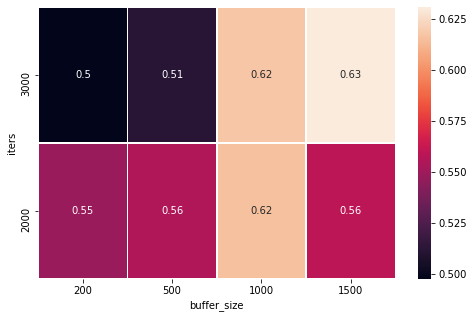

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### LR: Memory

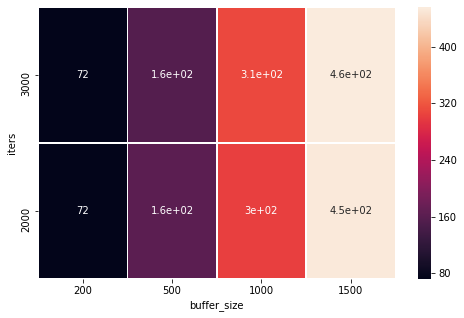

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### LR: GPU Usage

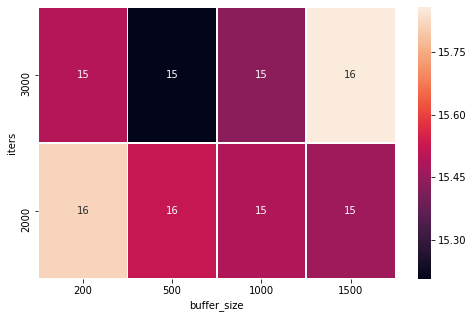

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# 3. GR

In [15]:
cd ~/Desktop/research_project_repo/research_project/experiments/vgg_gr_class_tuning/2021-05-09-02-26/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_gr_class_tuning/2021-05-09-02-26


In [16]:
logs = !ls

In [17]:
m = Metrics(logs, "generative")
df = m.get_metrics_df()
df

,iters,g_fc_uni,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,2000,1600,0.1250,3770.1,38.578249,4348.0
1,2000,3200,0.1250,4178.7,46.354067,8018.0
2,2000,800,0.1306,3579.6,34.631285,2710.0
3,3000,1600,0.1250,5680.8,38.021127,4348.0
4,3000,3200,0.1250,6271.4,45.453822,8018.0
5,3000,800,0.1250,5299.5,36.415094,2710.0


### GR: Accuracy

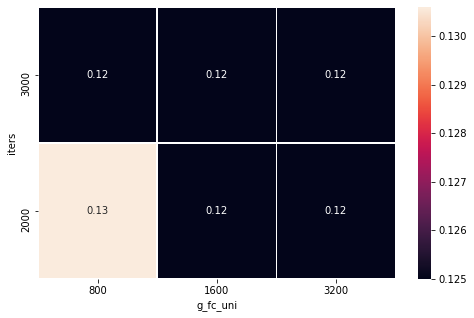

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### GR: Memory

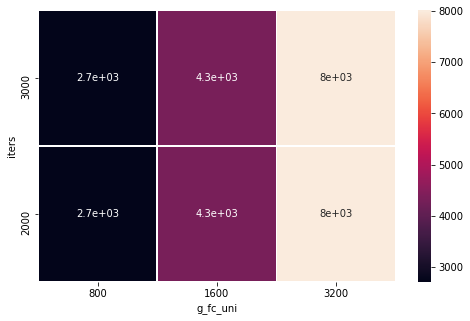

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### GR: GPU Usage

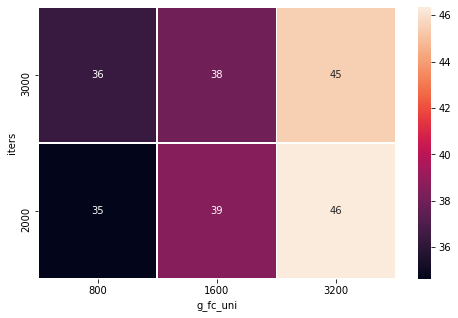

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# NR

In [21]:
cd ~/Desktop/research_project_repo/research_project/experiments/vgg_nr_class_tuning/2021-05-09-16-46/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_nr_class_tuning/2021-05-09-16-46


In [22]:
logs = !ls

In [23]:
m = Metrics(logs, "rehearsal")
df = m.get_metrics_df()
df

,iters,buffer_size,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,2000,1000,0.5707,3017.7,23.291391,2994.0
1,2000,1500,0.5538,2982.3,24.374582,3882.0
2,2000,200,0.5556,2936.5,25.241497,1114.0
3,2000,500,0.5809,2984.4,24.665552,1730.0
4,3000,1000,0.5750,4429.9,24.404063,3010.0
5,3000,1500,0.5366,4483.3,24.525612,3738.0
6,3000,200,0.5419,4488.1,24.044543,1162.0
7,3000,500,0.5208,4519.9,24.134956,1746.0


### NR: Accuracy

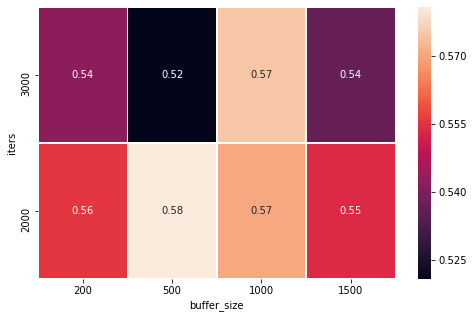

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### NR: Memory

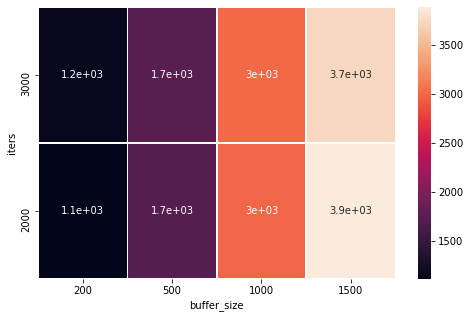

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

### NR: GPU Usage

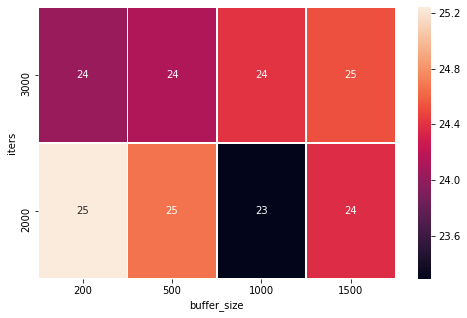

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 